## Calculating the Return of a Portfolio of Securities

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2000-1-1’ until today.

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [3]:
tickers = ['BP', 'F', 'XOM', 'LNC', 'AAPL']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4885 entries, 2000-01-03 to 2019-06-04
Data columns (total 5 columns):
BP      4885 non-null float64
F       4885 non-null float64
XOM     4885 non-null float64
LNC     4885 non-null float64
AAPL    4885 non-null float64
dtypes: float64(5)
memory usage: 229.0 KB


In [5]:
mydata.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2000-01-03,24.838348,15.798207,22.397268,25.153467,2.655498
2000-01-04,24.706383,15.270343,21.968271,24.429047,2.431611
2000-01-05,25.551050,15.326898,23.165886,23.583891,2.467196
2000-01-06,25.603836,15.345757,24.363516,24.015520,2.253689
2000-01-07,25.128702,16.476889,24.292015,24.624012,2.360442


In [6]:
mydata.tail()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2019-05-29,41.270000,9.71,72.160004,61.820000,177.380005
2019-05-30,41.029999,9.74,71.970001,61.740002,178.300003
2019-05-31,40.720001,9.52,70.769997,59.450001,175.070007
2019-06-03,41.040001,9.61,71.879997,60.779999,173.300003
2019-06-04,41.139999,9.88,72.598396,62.119999,176.220001


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [14]:
mydata.iloc[0]

BP      24.838348
F       15.798207
XOM     22.397268
LNC     25.153467
AAPL     2.655498
Name: 2000-01-03 00:00:00, dtype: float64

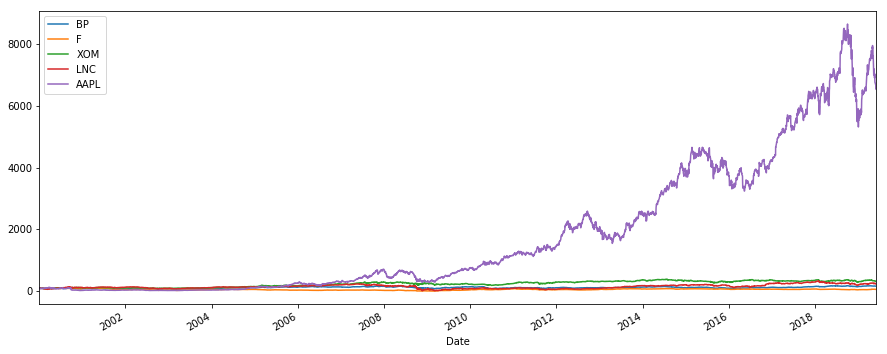

In [7]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

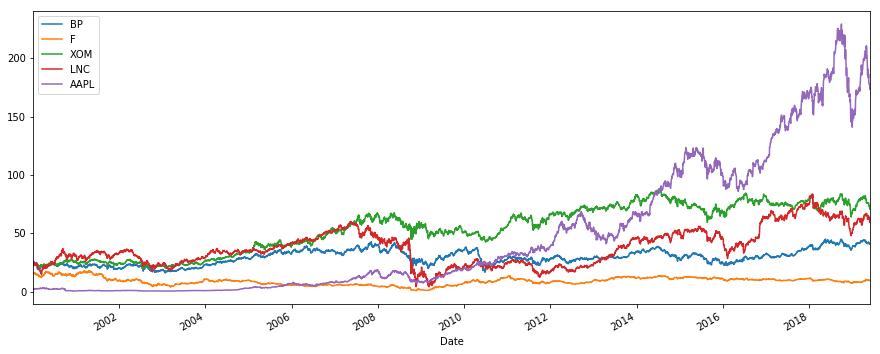

In [8]:
mydata.plot(figsize=(15,6))
plt.show()

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [9]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.005313,-0.033413,-0.019154,-0.028800,-0.084310
2000-01-05,0.034188,0.003704,0.054516,-0.034596,0.014634
2000-01-06,0.002066,0.001231,0.051698,0.018302,-0.086538
2000-01-07,-0.018557,0.073710,-0.002935,0.025337,0.047368


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [10]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [11]:
annual_returns = returns.mean() * 250
annual_returns

BP      0.064188
F       0.062136
XOM     0.088776
LNC     0.178986
AAPL    0.301269
dtype: float64

In [ ]:
# The dot multiplies it

In [21]:
np.dot(annual_returns, weights)

0.13785105851792287

Transform the result into a percentage form. 

In [12]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

13.874 %


Is the return of this portfolio satisfactory?

In [31]:
# Portfolio 2 with different weights

In [25]:
weights_2 = np.array([0.4,0.4,0.15,0.05])

In [30]:
pfolio_2 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_2)

13.785 %
